# **WhisperSpeechSplitter**

OpenAIのwhisperを用いて自動で文字起こしを行い、
そのデータをもとに音源の分割を行います。音源はBGMが除去された声のみの素材が望ましいです。

音声の切り出しを想定していますが、
動画の自動切り出しも可能です(突貫工事)。音声より時間がかかりますが、使えなくはないかも。




<使用方法>

各コードは、"code"と書かれた箇所の下の再生ボタンみたいなやつ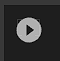を押すと実行できます。


<font color="red">**初回起動時(タイムアウト後も含む?)は、上部「ランタイム」タブ⇒「ランタイムのタイプを変更」⇒「ハードウェアアクセラレータ」が"GPU"になっているか確認してください。**</font>


▼最初はまずこの順で行ってください。(Ctrl+F9で「すべてのセルを実行」してもいいかもしれません)
1.   パッケージのインストール
2.   GoogleDriveのマウント
3.   音源のパスを指定
4.   whisperで文字起こし\
  4-1. モデルの読み込み\
  4-2. 文字起こし\
  (4-3. 文字起こしの結果の編集)
5.   音源の分割

▼連続して2回目以降音源を変えて実行する場合 (※ランタイムがタイムアウトした場合は1.から全部)
3.  音源のパスを指定
4.  4-2. を実行(4-1は不要)
5.  音源の分割







<補足>

2.のマウントが成功すると、画面左側のファイルメニュー内に"drive"が表示されるので、展開して任意の音源ファイルを探してください。右クリックからパスのコピーができます。

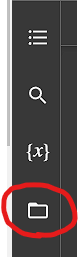

▲コレ


## **3. 音源のパスを指定**

In [1]:
#@title code { display-mode: "form" }
import os

#FILE_PATH = input("音源のファイルパスを入力してください(Enterで確定) >>")
FILE_PATH = "../resource/meeting_voice/meeting_demo_1half.wav"
#FILE_PATH = "../resource/onsei_kaigi1015/OGISmeeting.wav"
if (os.path.isfile(FILE_PATH)):
  fmt = os.path.splitext(FILE_PATH)[1].replace(".","")
  FILE_NAME =  os.path.splitext(os.path.basename(FILE_PATH))[0]
  DIR_NAME = os.path.dirname(FILE_PATH)
  print( "'" + FILE_NAME + "'" + "を読み込みました。")
else:
  raise FileNotFoundError("指定のファイルパスが見つかりませんでした。")

'meeting_demo_1half'を読み込みました。


## **4. Whisperによる文字起こし処理**

### **4-1. モデルの読み込み**

* 一度実行した後は、同じランタイムである限り4-1はスキップして大丈夫です。



In [2]:
#@title code { display-mode: "form" }
import whisper

model = whisper.load_model("large")


/home/kbylab/ogis2024/venv3_12_1/lib/python3.12/site-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(fp, map_location

### **4-2. 文字起こし**

In [4]:
#@title code { display-mode: "form" }
import pandas as pd

res = model.transcribe(FILE_PATH, verbose=False, language="ja")


speech_data = pd.DataFrame(res["segments"])[["start", "end", "text"]]
pd.set_option("display.max_rows", len(speech_data))
speech_data

100%|██████████| 2700/2700 [00:06<00:00, 392.05frames/s]


,start,end,text
0,0.00,5.76,これから新製品についての会議を始めようと思います
1,5.76,8.64,ターゲット層についてなんですが
2,8.64,14.46,新製品のターゲット層は30代から40代のビジネスマンに絞りましょう
3,14.46,17.84,高機能でスタイリッシュのデザインが有利になると思います
4,17.84,23.24,でも最近の若い人たちも同じ製品を求めている傾向があると
5,23.24,24.86,現場の声から聞いています
6,24.86,27.00,それに価格単位ももう少し


### **4-3. 文字起こし結果の編集(任意)**

実行すると文字起こしの結果を編集できます。

<使用方法>


1.   編集メニュー\
    ・行番号入力でその行の要素を編集できます。\
    ・コマンド'tr'で、全セリフから任意のワードを検索し、指定のワードで全置換する機能が使えます。\
    ・コマンド'd'で指定行を削除できます。\
    ・終了するには'e'を入力してください。

2.   行編集\
    ・'s'で分割開始時間、'e'で分割終了時間、't'でセリフを編集できます。\
    ・行編集を終了するには、「入力なし」もしくは上記以外のコマンドを入力してください。

3.   セリフ指定ワード置換(コマンド'tr')\
    ・「置換前ワード」を含むすべてのセリフについて、そのワードが出現する箇所をすべて「置換後ワード」に置き換えます。\
    ・自動文字起こしで、同じ言葉が同じ誤変換となった場合(固有名詞など)に便利です。

  
   <動作例>
   
         <BEFORE>                                                                        <AFTER>
    0 "鈴木が泳いでる"                                                             0 "スズキが泳いでる"

    1 "回転寿司で鈴木を頼む"     =====(置換前:"鈴木" / 置換後: "スズキ")====>      1 "回転寿司でスズキを頼む"

    2 "鈴木の軽自動車"                                                             2 "スズキの軽自動車"

    3 "鈴木スズキススキ鈴木"                                                       3 "スズキスズキススキスズキ"

4.    行削除(コマンド'd')\
    ・指定した行を削除します。\
    ・行削除を終了するには'e'を入力してください。

In [ ]:
#@title code { display-mode: "form" }

from pydub import *
from pydub.playback import play
import IPython.display as ipd
import shutil
import time
import pyperclip as pc

def isFloat(s):
  try:
    float(s)
  except ValueError:
    return False
  else:
    return True

def printDataFrame():
  print("="*200)
  print(speech_data)
  print("="*200)


os.makedirs("tmp_wss", exist_ok=True) #修正作業用の一時フォルダ

source_file = AudioSegment.from_file(FILE_PATH, format=fmt)
printDataFrame()
idx = input(f"◆編集メニュー: 修正するデータの行番号({speech_data.index[0]}～{speech_data.index[-1]})、またはコマンド('tr': セリフ指定ワード置換 / 'd': 行削除)を入力してください。'e'で終了します。>> ")


while idx != 'e':
  if idx.isnumeric():
    idx=int(idx)
    if (idx in speech_data.index):
      splitted_sound = source_file[speech_data["start"][idx]*1000 : speech_data["end"][idx]*1000]
      splitted_sound.export("tmp_wss/tmp.wav")
      print("▼指定の音声")
      ipd.display(ipd.Audio("tmp_wss/tmp.wav", autoplay=True))
      time.sleep(0.5)
      while True:
        colm = input(f"修正箇所を指定(右記以外の入力で終了)⇒ 's':開始時間[sec] / 'e':終了時間[sec] / 't':セリフ>> ")
        if(colm == 's'):
          val = input(f"開始時間を入力してください。(現在値: {speech_data.at[idx, 'start']}) [sec]>> ")
          speech_data.at[idx, 'start'] = float(val) if isFloat(val) else speech_data.at[idx, 'start']
        elif(colm == 'e'):
          val = input(f"終了時間を入力してください。(現在値: {speech_data.at[idx, 'start']}) [sec]>> ")
          speech_data.at[idx, 'end'] = float(val) if isFloat(val) else speech_data.at[idx, 'end']
        elif(colm == 't'):
          val = input(f"セリフを入力してください。(現在値: {speech_data.at[idx, 'text']})>> ")
          speech_data.at[idx, 'text'] = val
        else:
          ipd.clear_output()
          print(f"▼修正完了: {idx}行目")
          print(f"{speech_data['text'][idx]}")
          break
    else:
      ipd.clear_output()


  elif(idx == 'tr'):
    print("指定のワードが出現するすべてのセリフについて、出現箇所を任意のワードで置換します。")
    word_before = input(f"置換前のワードを入力してください: >>")
    tmp_df = speech_data.query('text.str.contains(@word_before)', engine='python')
    word_after = input(f"置換後のワードを入力してください: >>")
    for i in tmp_df.index:
      speech_data.at[i, 'text'] = speech_data.at[i, 'text'].replace(word_before, word_after)
    ipd.clear_output()
    print(f"▼修正完了: {[(str(i)+'行目 ') for i in tmp_df.index]}")
    print(tmp_df)

  elif(idx == 'd'):
    while True:
      speech_data = speech_data.reset_index(drop=True)
      ipd.clear_output()
      printDataFrame()
      val = input(f"削除する行番号({speech_data.index[0]}～{speech_data.index[-1]})を入力してください。'e'で終了します。>> ")
      if val.isnumeric():
        val = int(val)
        if (val in speech_data.index):
          speech_data = speech_data.drop(val) if input(f"{val}行目を削除します。よろしければもう一度行番号({val})を入力してください。異なる入力でキャンセルできます。>>") == str(val) else speech_data
        else:
          print("無効な値です。")
      elif (val == "e"):
        ipd.clear_output()
        break
      else:
        print("無効な値(コマンド)です。")

  else:
    ipd.clear_output()
    print("無効な値(コマンド)です。")

  printDataFrame()
  idx = input(f"◆編集メニュー: 修正するデータの行番号({speech_data.index[0]}～{speech_data.index[-1]})、またはコマンド('tr': セリフ指定ワード置換 / 'd': 行削除)を入力してください。'e'で終了します。>>")


shutil.rmtree("tmp_wss")
ipd.clear_output()
speech_data

    start    end                                              text
0    0.70   5.24                新製品のターゲット層は30代から40代のビジネスマンに絞りましょう。
1    6.08   8.22                         高機能でスタイリッシュなデザインが売りになります。
2    9.56  13.98          でも最近の若い人たちも同じ製品を求めている傾向があると現場の声から聞いています。
3   14.36  16.84                                  それに価格ももう少し広げた方が…
4   16.84  19.68                            いや、30代以上に限定するべきだと思います。
5   20.20  22.44                            若い層はどうせ似たようなものを買うでしょう?
6   23.12  27.18                    私たちが開発した技術は幅広い年齢層にアピールできるものです。
7   27.18  30.42                                  技術的にも他の層に響く可能性が…
8   30.42  32.42                                 でもリソースは限られているんです。
9   33.34  36.04                         今のマーケティング戦略を変更する余裕はありません。
10  37.28  42.54  それは理解していますが、もし市場の動向が変わったら、最初から視野を狭めるのはリスクだと思います。
11  43.40  46.96                              うーん、そこまで考える時間はないんです。
12  47.64  48.96                                      今はこの路線で行きます。
13  49.48  53.86                        わかりました。しかし、もし失敗したらその時の

## **6.素材の分割(pydub)**

*  セリフで分割された音声(または動画)ファイルが生成されます(※)。音源と同一のディレクトリ内に"(音源名)_split"というフォルダが作成され、この中に出力されます。
*  動画ファイルの分割を行う場合は出力ファイルのフレームレートを選択してください(手入力可)。フレームレートによりますが、<font color="red">**出力に時間がかかります。**</font>



In [ ]:
#@title code { display-mode: "form" }
#@markdown ###動画または音声ファイルの分割処理を行わず，ＣＳＶファイルのみ出力する場合はチェックを入れてください．
dnt_split = False #@param {type:"boolean"}
import math
from moviepy.editor import VideoFileClip
sound_format_list = ["mp3", "wav", "flac", "aac", "flac", "mp2"]
movie_format_list = ["mp4", "mkv", "wmv", "m4v", "avi", "mpg", "mov"]

folder_num = 0

export_dir = f"{DIR_NAME}/{FILE_NAME}_split"
while os.path.isdir(export_dir):
  folder_num += 1
  export_dir = f"{DIR_NAME}/{FILE_NAME}_split_{folder_num}"
os.mkdir(export_dir)

if not dnt_split:
  if fmt in sound_format_list:
    source_file = AudioSegment.from_file(FILE_PATH, format=fmt)
    for i in speech_data.index:
      print(f"\r◆{math.ceil(((i+1)/len(speech_data))*100)}% - Exporting({i+1} of {len(speech_data)}): {i+1}_{speech_data['text'][i]}.{fmt}",end='')
      splitted_sound = source_file[speech_data["start"][i]*1000 : speech_data["end"][i]*1000]
      splitted_sound.export(f"{export_dir}/{i+1}-{speech_data['text'][i]}.{fmt}")


  elif fmt in movie_format_list:
    sourceVideo = VideoFileClip(FILE_PATH)
    #@markdown ###フレームレートを選択(手入力可)
    FPS = "30" #@param [5, 23.98, 24, 25, 29.97, 30, 50, 59.94, 60, 119.88, 120, 240]{allow-input:true}
    print(sourceVideo.fps,"fps")
    for i in speech_data.index:
      print(f"\r◆{math.ceil(((i+1)/len(speech_data))*100)}% - Exporting({i+1} of {len(speech_data)}): {i+1}_{speech_data['text'][i]}.{fmt}"+"\033[9A",end='')
      vid = sourceVideo.subclip(speech_data["start"][i], speech_data["end"][i])
      vid.write_videofile(f"{export_dir}/{i+1}-{speech_data['text'][i]}.{fmt}", fps=float(FPS))
      ipd.clear_output()


  else:
    print("拡張子を確認してください。")

speech_data.to_csv(f"{export_dir}/data.csv", index=True)

print("\r ◆◆ Process Completed. ◆◆")

 ◆◆ Process Completed. ◆◆


## **new1.話者識別テスト**

In [5]:
import numpy as np
import contextlib
import wave
#from pyannote.audio import Pipeline
from pyannote.audio.pipelines.speaker_verification import PretrainedSpeakerEmbedding
from pyannote.audio import Audio
from pyannote.core import Segment, notebook

def segment_embedding(
    file_name: str,
    duration: float,
    segment,
    embedding_model: PretrainedSpeakerEmbedding
) -> np.ndarray:
    """
    音声ファイルから指定されたセグメントの埋め込みを計算します。
    
    Parameters
    ----------
    file_name: str
        音声ファイルのパス
    duration: float
        音声ファイルの継続時間
    segment: whisperのtranscribeのsegment
    embedding_model: PretrainedSpeakerEmbedding
        埋め込みモデル

    Returns
    -------
    np.ndarray
        計算された埋め込みベクトル
    """
    audio = Audio()
    start = segment["start"]
    end = min(duration, segment["end"])
    clip = Segment(start, end)
    waveform, sample_rate = audio.crop(file_name, clip)
    #print(waveform)
    return embedding_model(waveform[None])

def generate_speaker_embeddings(
    meeting_file_path: str,
    transcript
) -> np.ndarray:
    """
    音声ファイルから話者の埋め込みを計算します。
    
    Parameters
    ----------
    meeting_file_path: str
        音声ファイルのパス
    transcript: Whisper API の transcribe メソッドの出力結果

    Returns
    
    -------
    np.ndarray
        計算された話者の埋め込み群
    """
    segments = transcript['segments']
    embedding_model = PretrainedSpeakerEmbedding("speechbrain/spkrec-ecapa-voxceleb", device='cpu')
    embeddings = np.zeros(shape=(len(segments), 192))

    with contextlib.closing(wave.open(meeting_file_path, 'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)

    for i, segment in enumerate(segments):
        embeddings[i] = segment_embedding(meeting_file_path, duration, segment, embedding_model)

    embeddings = np.nan_to_num(embeddings)
    return embeddings


/home/kbylab/ogis2024/venv3_12_1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from typing import List, Tuple

def clustering_embeddings(speaker_count: int, embeddings: np.ndarray) -> AgglomerativeClustering:
    """
    埋め込みデータをクラスタリングして、クラスタリングオブジェクトを返します。

    Parameters
    ----------
    embeddings: np.ndarray
        分散表現（埋め込み）のリスト。

    Returns
    -------
    AgglomerativeClustering
        クラスタリングオブジェクト。
    """
    clustering = AgglomerativeClustering(speaker_count).fit(embeddings)
    return clustering

def format_speaker_output_by_segment(clustering: AgglomerativeClustering, transcript: dict) -> str:
    """
    クラスタリングの結果をもとに、各発話者ごとにセグメントを整形して出力します

    Parameters
    ----------
    clustering: AgglomerativeClustering
        クラスタリングオブジェクト。
    transcript: dict
        Whisper API の transcribe メソッドの出力結果

    Returns
    -------
    str
        発話者ごとに整形されたセグメントの文字列
    """
    labeled_segments = []
    for label, segment in zip(clustering.labels_, transcript["segments"]):
        labeled_segments.append((label, segment["start"], segment["text"]))

    output = ""
    for speaker, _, text in labeled_segments:
        output += f"話者{speaker + 1}: 「{text}」\n"
    return output


In [8]:
from scipy.spatial.distance import cosine

def closest_reference_speaker(embedding: np.ndarray, references: List[Tuple[str, np.ndarray]]) -> str:
    """
    与えられた埋め込みに最も近い参照話者を返します。

    Parameters
    ----------
    embedding: np.ndarray
        話者の埋め込み
    references: List[Tuple[str, np.ndarray]]
        参照話者の名前と埋め込みのリスト

    Returns
    -------
    str
        最も近い参照話者の名前
    """
    min_distance = float('inf')
    closest_speaker = None
    for name, reference_embedding in references:
        #print(reference_embedding.shape)
        reference_embedding = reference_embedding[0]
        distance = cosine(embedding, reference_embedding)
        if distance < min_distance:
            min_distance = distance
            closest_speaker = name

    return closest_speaker

def format_speaker_output_by_segment2(embeddings: np.ndarray, transcript: dict, reference_embeddings: List[Tuple[str, np.ndarray]]) -> str:
    """
    各発話者の埋め込みに基づいて、セグメントを整形して出力します。

    Parameters
    ----------
    embeddings: np.ndarray
        話者の埋め込みのリスト
    transcript: dict
        Whisper API の transcribe メソッドの出力結果
    reference_embeddings: List[Tuple[str, np.ndarray]]
        参照話者の名前と埋め込みのリスト

    Returns
    -------
    str
        発話者ごとに整形されたセグメントの文字列。
    """
    labeled_segments = []
    for embedding, segment in zip(embeddings, transcript["segments"]):
        #print(embedding.shape)
        speaker_name = closest_reference_speaker(embedding, reference_embeddings)
        labeled_segments.append((speaker_name, segment["start"], segment["text"]))

    output = ""
    for speaker, _, text in labeled_segments:
        output += f"{speaker}: 「{text}」\n"
    return output


### new1-2 **実行部分テスト**

In [9]:
#会議音声のクラスタリング
FILE_PATH = "../resource/meeting_voice/meeting_demo_special_record_deluxe.wav"
#FILE_PATH = "../resource/onsei_kaigi1015/OGISmeeting.wav"
#FILE_PATH = "../resource/output.wav"
num_people = 2  #話者の数

import pandas as pd
res_meet = model.transcribe(FILE_PATH, verbose=False, language="ja")

embed_meet = generate_speaker_embeddings(FILE_PATH,res_meet)

clus_embed_meet = clustering_embeddings(num_people,embed_meet)
format_out_meet = format_speaker_output_by_segment(clus_embed_meet, res_meet)
format_out_meet


100%|██████████| 7037/7037 [00:18<00:00, 385.85frames/s]
/home/kbylab/ogis2024/venv3_12_1/lib/python3.12/site-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
/home/kbylab/ogis2024/venv3_12_1/lib/python3.12/site-packages/speechbrain/utils/checkpoints.py:194: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be a

'話者1: 「今日これから新製品についての会議を始めます。」\n話者1: 「ターゲット層についてなんですが、」\n話者1: 「新製品のターゲット層は30代から40代のビジネスマンに絞りましょう。」\n話者1: 「高企業でスタイリッシュのデザインが有利になると思います。」\n話者1: 「でも最近の若い人たちも同じ製品を求めている傾向があると現場の声が聞こえます。」\n話者1: 「それに価格単位をもう少し広げた方が、」\n話者1: 「いや、30代以上に限定するべきだと思います。」\n話者2: 「若い層がどうせ似たようなものを買うでしょう。」\n話者1: 「私たちが開発した技術は幅広いデザイン層でうっきりできるものです。」\n話者1: 「技術的にも他の層に響く可能性があります。」\n話者1: 「でも、2層しか限られているんです。」\n話者2: 「今のパワーリーティング戦でこれでもこうする余裕はありません。」\n話者1: 「それは理解していますが、」\n話者1: 「もし市場の動向が変わったら、」\n話者1: 「最初から知恵を狭めるようなリスクがあると思います。」\n話者1: 「うーん、」\n話者1: 「考える時間はないんです。」\n話者2: 「今はこの路線で行きます。」\n話者1: 「わかりました。」\n話者1: 「しかし、もし失敗したらその時の責任は?」\n話者1: 「失敗しません。」\n話者1: 「私たちはこれで行きます。」\n話者1: 「今日の会議は終わりです。」\n'

In [10]:
#各話者の参考音声のembedding
FILE_PATH_DICT = {"hanagata": "../resource/onsei_kaigi1015/hanagata_sample_voice.wav", "isizawa": "../resource/meeting_voice/ishizawa_sample.wav",
                  "shibasaki": "../resource/onsei_kaigi1015/shibasaki_sample.wav"}
                  #"takeda": "../resource/takeda_sample_voice.wav"}
#num_people = 1  #話者の数
ref = []
import pandas as pd
for name, file in FILE_PATH_DICT.items():
    res = model.transcribe(file, verbose=False, language="ja")
    embed = generate_speaker_embeddings(file,res)
    #clus_embed = clustering_embeddings(num_people, embed)
    #format_out = format_speaker_output_by_segment(clus_embed, res)
    ref.append((name,embed))
close_ref_speaker = format_speaker_output_by_segment2(embed_meet,res_meet,ref)

#print(close_ref_speaker)




100%|██████████| 1130/1130 [00:01<00:00, 652.93frames/s]
/home/kbylab/ogis2024/venv3_12_1/lib/python3.12/site-packages/speechbrain/utils/checkpoints.py:194: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to

In [12]:
print(close_ref_speaker)
with open("../resource/out_puts/test.txt", 'w', encoding="utf-8") as file:
    file.write(close_ref_speaker)


hanagata: 「今日これから新製品についての会議を始めます。」
hanagata: 「ターゲット層についてなんですが、」
isizawa: 「新製品のターゲット層は30代から40代のビジネスマンに絞りましょう。」
isizawa: 「高企業でスタイリッシュのデザインが有利になると思います。」
isizawa: 「でも最近の若い人たちも同じ製品を求めている傾向があると現場の声が聞こえます。」
isizawa: 「それに価格単位をもう少し広げた方が、」
isizawa: 「いや、30代以上に限定するべきだと思います。」
isizawa: 「若い層がどうせ似たようなものを買うでしょう。」
shibasaki: 「私たちが開発した技術は幅広いデザイン層でうっきりできるものです。」
shibasaki: 「技術的にも他の層に響く可能性があります。」
isizawa: 「でも、2層しか限られているんです。」
isizawa: 「今のパワーリーティング戦でこれでもこうする余裕はありません。」
isizawa: 「それは理解していますが、」
hanagata: 「もし市場の動向が変わったら、」
isizawa: 「最初から知恵を狭めるようなリスクがあると思います。」
hanagata: 「うーん、」
hanagata: 「考える時間はないんです。」
isizawa: 「今はこの路線で行きます。」
shibasaki: 「わかりました。」
shibasaki: 「しかし、もし失敗したらその時の責任は?」
isizawa: 「失敗しません。」
isizawa: 「私たちはこれで行きます。」
isizawa: 「今日の会議は終わりです。」

